<a href="https://colab.research.google.com/github/mingo514/PCA_explainability_Paper---MATH60629A_MACHINE_LEARNING_I/blob/main/PCA_ExplainabilityUMPA_TSNE_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GROUP MEMBERS**


-KOUASSI CYRILLE KOUASSI

-PIERE CHANEL

-GABRIEL JOBERT



## Data procesing

Our data contains six variables sets of characteristics:
1. mfeat-fou: 76 Fourier coefficients of the character shapes;
2. mfeat-fac: 216 profile correlations;
3. mfeat-kar: 64 Karhunen-Loeve coefficients;
4. mfeat-pix: 240 pixel averages in 2 × 3 windows;
5. mfeat-zer: 47 Zernike moments;
6. mfeat-mor: 6 morphological features.

**Task** :
We made an exploratory study (PCA, segmentation) to have new variables less numerous and made the classifications.

### Import Librairies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data import and processing

In [ ]:
mfeat_fac=pd.read_csv("/content/drive/MyDrive/Msc/ML1/Group Project/Data/mfeat-fac",sep=' ',skipinitialspace = True ,header=None)
mfeat_fou=pd.read_csv("/content/drive/MyDrive/Msc/ML1/Group Project/Data/mfeat-fou",sep=' ',skipinitialspace = True ,header=None)
mfeat_kar=pd.read_csv("/content/drive/MyDrive/Msc/ML1/Group Project/Data/mfeat-kar",sep=' ',skipinitialspace = True ,header=None)
mfeat_mor=pd.read_csv("/content/drive/MyDrive/Msc/ML1/Group Project/Data/mfeat-mor",sep=' ',skipinitialspace = True ,header=None)
mfeat_pix=pd.read_csv("/content/drive/MyDrive/Msc/ML1/Group Project/Data/mfeat-pix",sep=' ',skipinitialspace = True ,header=None)
mfeat_zer=pd.read_csv("/content/drive/MyDrive/Msc/ML1/Group Project/Data/mfeat-zer",sep=' ',skipinitialspace = True ,header=None)


In [ ]:
four_labels=[]
fac_labels=[]
kar_labels=[]
mor_labels=[]
pix_labels=[]
zer_labels=[]
for i in range(1,77):
    four_labels.append('four_{}'.format(i))

for i in range(1,217):
    fac_labels.append('fac_{}'.format(i))

for i in range(1,65):
    kar_labels.append('kar_{}'.format(i))

for i in range(1,7):
    mor_labels.append('mor_{}'.format(i))

for i in range(1,241):
    pix_labels.append('pix_{}'.format(i))

for i in range(1,48):
    zer_labels.append('zer_{}'.format(i))


In [ ]:
four=mfeat_fou
fac=mfeat_fac
kar=mfeat_kar
mor=mfeat_mor
pix=mfeat_pix
zer=mfeat_zer

In [ ]:

four.columns=four_labels
fac.columns=fac_labels
kar.columns=kar_labels
mor.columns=mor_labels
pix.columns=pix_labels
zer.columns=zer_labels

In [ ]:
data=pd.concat([fac,four,kar,mor,pix,zer],axis=1)
data.head()

,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,fac_9,fac_10,...,zer_38,zer_39,zer_40,zer_41,zer_42,zer_43,zer_44,zer_45,zer_46,zer_47
0,98,236,531,673,607,647,2,9,3,6,...,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,121,193,607,611,585,665,7,9,2,4,...,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,115,141,590,605,557,627,12,6,3,3,...,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,90,122,627,692,607,642,0,6,4,5,...,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,157,167,681,666,587,666,8,6,1,4,...,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513


We have a database with 2000 observations and 649 explanatory variables.

### Standardisation

In principal component analysis, variables are often standardized. This is particularly recommanded when variables are measured in diﬀerent units (e.g. kilograms, kilometers, centi- meters, ...); otherwise, the PCA result obtained will be strongly aﬀected.
The aim is to make the variables comparable.  Generally, variables are normalized so that they have at ﬁnal i) a standard deviation equal to one and ii) a mean equal to zero.
Technically, the approach consists in transforming the data by subtracting from each value a reference value (the mean of the variable) and dividing it by the standard deviation. Following this transformation, the data obtained are referred to as centered-reduced data. The PCA applied to these transformed data is called normalized PCA.

In [ ]:
mean_data=data.mean()
std_data=data.std()
data_scaled=(data - mean_data)/std_data
data_scaled.head()

,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,fac_9,fac_10,...,zer_38,zer_39,zer_40,zer_41,zer_42,zer_43,zer_44,zer_45,zer_46,zer_47
0,-1.906882,-0.792545,-1.739844,-0.745042,-0.683703,-0.440438,-1.537234,-1.274927,-1.390649,-0.747721,...,-0.862236,-0.160169,-1.564684,-1.633185,-0.982319,-0.756905,0.074372,-1.276216,-0.678507,0.426795
1,-1.654897,-1.185503,-1.197535,-1.312944,-1.133232,-0.228870,-1.096765,-1.274927,-1.503170,-1.237387,...,-0.507767,-0.102594,-0.631978,-0.229636,-0.797572,-0.221317,-0.157228,-0.804745,-0.740493,0.135111
2,-1.720632,-1.660707,-1.318841,-1.367902,-1.705360,-0.675514,-0.656297,-1.682990,-1.390649,-1.482221,...,-0.958162,-0.679116,-1.254390,0.085372,-0.929826,0.211912,-0.689569,-1.155416,-0.898144,0.577542
3,-1.994529,-1.834339,-1.054823,-0.571007,-0.683703,-0.499207,-1.713421,-1.682990,-1.278128,-0.992554,...,-1.009379,-0.870925,-1.247175,-0.116992,-0.303761,0.438058,-0.811221,-1.402590,-0.257834,0.929265
4,-1.260487,-1.423105,-0.669498,-0.809160,-1.092366,-0.217116,-1.008672,-1.682990,-1.615692,-1.237387,...,-1.284989,-1.069122,-1.252107,0.393383,-0.483799,-0.692122,-1.091386,-1.205445,-0.376883,-0.234833


After standardizing the data, we calculate the correlation matrix, which will enable us to determine the eigenvalues and eigenvectors that will faithfully reduce the size of the initial dataset, while showing the point clouds of individuals in relation to the variables.

# Principal Component Analysis

**Let's run a normalized PCA on the large table (2000,649)**

## Demo : "Manual" PCA


### Correlation matrix
PCA is applied to the correlation matrix of standardized data. Principal components are calculated from this matrix.

In [ ]:
### Calcule de la matrice X de data

cormat=np.cov(data_scaled, rowvar=False)
cormat

array([[ 1.        ,  0.50356431,  0.55298713, ...,  0.56124947,
        -0.12914998, -0.68517389],
       [ 0.50356431,  1.        ,  0.63345686, ...,  0.44328056,
         0.17467858, -0.36159648],
       [ 0.55298713,  0.63345686,  1.        , ...,  0.47239218,
         0.05743999, -0.46193663],
       ...,
       [ 0.56124947,  0.44328056,  0.47239218, ...,  1.        ,
        -0.19527022, -0.25014806],
       [-0.12914998,  0.17467858,  0.05743999, ..., -0.19527022,
         1.        , -0.05968895],
       [-0.68517389, -0.36159648, -0.46193663, ..., -0.25014806,
        -0.05968895,  1.        ]])

### Display correlated pairs

In [ ]:
indices = np.where((cormat > 0.81) & (cormat < 1))


variable_pairs = [(i, j) for i, j in zip(indices[0], indices[1])]

# Afficher les paires corrélées
for pair in variable_pairs:
    var1 = pair[0]
    var2 = pair[1]
    correlation = cormat[var1, var2]
    print(f"Variables {var1} et {var2} have a correlation of {correlation:.2f}")

Variables 1 et 1 have a correlation of 1.00
Variables 1 et 133 have a correlation of 0.88
Variables 1 et 145 have a correlation of 0.84
Variables 2 et 2 have a correlation of 1.00
Variables 2 et 6 have a correlation of 0.89
Variables 2 et 26 have a correlation of 0.81
Variables 2 et 38 have a correlation of 0.91
Variables 2 et 50 have a correlation of 0.91
Variables 2 et 62 have a correlation of 0.96
Variables 2 et 110 have a correlation of 0.99
Variables 2 et 122 have a correlation of 0.99
Variables 2 et 134 have a correlation of 0.99
Variables 2 et 146 have a correlation of 0.98
Variables 2 et 170 have a correlation of 0.88
Variables 2 et 182 have a correlation of 1.00
Variables 2 et 198 have a correlation of 0.91
Variables 2 et 206 have a correlation of 0.98
Variables 3 et 3 have a correlation of 1.00
Variables 3 et 15 have a correlation of 0.96
Variables 3 et 39 have a correlation of 0.94
Variables 3 et 75 have a correlation of 0.93
Variables 3 et 87 have a correlation of 0.97
Vari

When two variables are highly correlated, this means that there is a strong linear relationship between them.
Note that PCA is particularly useful when the variables in the dataset are highly correlated. Correlation indicates that there is redundancy in the data. Because of this redundancy, PCA can be used to reduce the original variables into a smaller number of new variables (=principal components), the latter explaining most of the variance contained in the original variables.

### **Calculation of eigenvalues of the Correlation Matrix and their associated eigenvectors**

eigenvalues measure the amount of variance explained by each principal axis. Eigenvalues are large for the first axes and small for the following axes. In other words, the first axes correspond to the directions carrying the maximum amount of variation contained in the dataset.

The first step involves obtaining the eigenvalues associated with the correlation matrix. Recalling that each eigenvalue λ corresponds to the inertia explained by the axis ∆u constructed from the eigenvector u associated with λ, it is then possible to calculate the percentage of total inertia explained by ∆u:

$$ \% \text{ inertia explained by } \Delta u_1 = \frac{\lambda_1}{\sum_{i=1}^{p} \lambda_i} $$

Here, $ \lambda_i $ represents the eigenvalues, \( p \) is the number of principal components, and the sum is taken over all principal components. This formula calculates the percentage of total inertia explained by the first principal component $ \Delta u_1 $.

In [ ]:
from numpy import linalg as LA
egvalues,egvectors = LA.eig(cormat)
print('eigenvalues\n\n',egvalues)
print('-'*90)
print('eigenvectors\n\n',egvectors) ## calculates eigenvalues and eigenvectors


Variables 605 et 605 have a correlation of 1.00
Variables 605 et 617 have a correlation of 0.97
Variables 605 et 627 have a correlation of 0.92
Variables 605 et 635 have a correlation of 0.88
Variables 606 et 606 have a correlation of 1.00
Variables 608 et 608 have a correlation of 1.00
Variables 609 et 609 have a correlation of 1.00
Variables 610 et 610 have a correlation of 1.00
Variables 610 et 621 have a correlation of 1.00
Variables 611 et 611 have a correlation of 1.00
Variables 611 et 622 have a correlation of 0.99
Variables 611 et 631 have a correlation of 0.98
Variables 612 et 612 have a correlation of 1.00
Variables 612 et 623 have a correlation of 0.97
Variables 612 et 632 have a correlation of 0.93
Variables 612 et 639 have a correlation of 0.89
Variables 615 et 603 have a correlation of 1.00
Variables 616 et 604 have a correlation of 0.99
Variables 616 et 616 have a correlation of 1.00
Variables 616 et 626 have a correlation of 1.00
Variables 616 et 627 have a correlation

**Kaiser rule**

An eigenvalue > 1 indicates that the principal component (PC) in question represents more variance than a single original variable, when the data are standardized. This is generally used as a threshold above which PCs are retained. Note that this only applies when data are standardized.

In [ ]:
def eigenvalues_de_Kaiser(egvalues,egvectors):
    liste=[]
    liste1=[]
    for i in range(len(egvalues)):
        if egvalues[i]>1:
            liste.append(egvalues[i])
            liste1.append(egvectors[i])
    return liste,liste1

egval_retained,egvect_retained=eigenvalues_de_Kaiser(egvalues,egvectors)
print("According to the Kaiser rule, only", len(egval_retained),' eigenvalues')

According to the Kaiser rule, only 77  eigenvalues


###**The percentage of each eigenvalue**
We can also limit the number of axes to a number that represents a certain fraction of the total variance. For example, we're happy with 80% of the total variance explained, so we'll use the number of axes to achieve this.

In [ ]:
pegv=pd.DataFrame({'axe': np.arange(egvalues.shape[0])+1,'eigenvalues':list(egvalues)})
#Tpv=pd.DataFrame({'eigenvalues':egvalues})
pegv
pegv['proportion']=pegv['eigenvalues']/pegv['eigenvalues'].sum()*100
pegv['cumul']=pegv['proportion'].cumsum()
pegv.head(44)

,axe,eigenvalues,proportion,cumul
0,1,96.033065,14.797083,14.797083
1,2,65.099067,10.030673,24.827755
2,3,55.128091,8.494313,33.322068
3,4,36.353079,5.601399,38.923467
4,5,31.506156,4.854569,43.778037
5,6,25.116580,3.870043,47.648080
6,7,21.751813,3.351589,50.999669
7,8,17.552529,2.704550,53.704219
8,9,15.400992,2.373034,56.077253
9,10,14.359012,2.212483,58.289735


Take a look at the percentage of variance explained by these 44 principal components: at over 80%, we've retained a great deal of information from the original data.

**REMARK**:
Unfortunately, there is no well-accepted objective method for deciding how many principal axes suﬃsent. This will depend on the speciﬁc application domain and the speciﬁc dataset. In practice, we tend to look at the first principal axes aﬁn to find interesting proﬁls in the data.
In our analysis, the first 44 principal components explain 80% of the variation. This is an acceptable percentage.

### Calculation of principal components

In [ ]:
import numpy as np

num_components = 44  # Number of components to keep


v_selected = egval_retained[:num_components]
u_selected = egvect_retained[:num_components]

# Calculation of principal components
u_selected = np.array(u_selected).T
c_selected = np.dot(data_scaled.values, u_selected)

# Component conversion to float (if not already float)
c_selected = c_selected.astype(float)

print(len(v_selected))

44


In [ ]:
pd.DataFrame(c_selected)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.427797,1.676326,1.730194,1.068643,0.453293,-0.445118,-1.771353,-1.400264,0.077845,-0.502075,...,-0.242066,-0.663117,0.794239,-1.306857,0.646545,0.345441,-0.430951,1.715888,0.529190,-1.048242
1,-0.000106,0.191900,1.494281,0.894580,0.730765,0.600158,-0.692578,-0.687955,-0.088478,-0.201331,...,-0.268589,0.381193,-0.735109,-0.470003,0.473258,-0.177605,0.578899,0.359169,0.073456,0.061035
2,0.116438,0.980907,1.832979,1.106041,-0.636342,0.922831,-1.006458,-0.673679,1.296426,-0.866798,...,-1.590656,1.103932,0.180853,-0.566095,0.107371,-0.948770,-1.159417,-0.934421,1.117964,0.320405
3,0.632431,0.685767,1.201875,0.684036,0.885183,1.053109,-0.771708,-0.509013,1.264320,-0.371559,...,-1.185183,0.739118,0.284956,-0.017770,0.858791,-0.714392,-0.564668,-1.201281,1.375085,-0.033140
4,0.166389,-0.042012,1.727746,1.293310,0.099974,1.137320,-0.959233,-0.654351,0.815510,-0.882090,...,-0.221879,0.314161,-0.518578,-1.010361,0.436380,0.105419,-0.290125,0.223346,1.459495,0.915767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.535551,0.228747,1.761813,0.075177,0.912680,0.614193,-1.468292,-0.779218,0.163973,-0.080246,...,-0.608086,-1.205275,0.006729,-1.110080,-0.731492,0.152155,0.076073,0.849130,1.545140,0.675414
1996,-1.406138,0.002674,-0.067539,-0.357811,0.199789,0.871389,-0.696210,0.355891,-1.392265,0.983231,...,1.301297,0.747363,-0.824317,0.075858,-0.036930,-0.326758,0.144517,-1.073032,-0.646103,0.081148
1997,-1.196376,0.527481,0.933086,-0.257655,1.612487,1.066143,-0.704551,-0.353647,-0.914192,-0.185151,...,-0.735794,-0.511605,-0.897146,-0.490298,-1.227249,-0.519487,-0.019193,-1.214300,0.966605,-0.616219
1998,-0.614731,-0.302330,1.721142,0.291461,0.769055,0.769141,-0.836486,-1.342797,-1.011985,-0.710330,...,-0.743351,1.019455,-0.697882,0.199543,-0.649048,0.750472,-0.231344,-1.185851,-0.188194,-0.267886


In [ ]:
data_pca=pd.DataFrame(c_selected)
data_pca.columns = [f'F{i+1}' for i in range(num_components)]
data_pca

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F35,F36,F37,F38,F39,F40,F41,F42,F43,F44
0,0.427797,1.676326,1.730194,1.068643,0.453293,-0.445118,-1.771353,-1.400264,0.077845,-0.502075,...,-0.242066,-0.663117,0.794239,-1.306857,0.646545,0.345441,-0.430951,1.715888,0.529190,-1.048242
1,-0.000106,0.191900,1.494281,0.894580,0.730765,0.600158,-0.692578,-0.687955,-0.088478,-0.201331,...,-0.268589,0.381193,-0.735109,-0.470003,0.473258,-0.177605,0.578899,0.359169,0.073456,0.061035
2,0.116438,0.980907,1.832979,1.106041,-0.636342,0.922831,-1.006458,-0.673679,1.296426,-0.866798,...,-1.590656,1.103932,0.180853,-0.566095,0.107371,-0.948770,-1.159417,-0.934421,1.117964,0.320405
3,0.632431,0.685767,1.201875,0.684036,0.885183,1.053109,-0.771708,-0.509013,1.264320,-0.371559,...,-1.185183,0.739118,0.284956,-0.017770,0.858791,-0.714392,-0.564668,-1.201281,1.375085,-0.033140
4,0.166389,-0.042012,1.727746,1.293310,0.099974,1.137320,-0.959233,-0.654351,0.815510,-0.882090,...,-0.221879,0.314161,-0.518578,-1.010361,0.436380,0.105419,-0.290125,0.223346,1.459495,0.915767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.535551,0.228747,1.761813,0.075177,0.912680,0.614193,-1.468292,-0.779218,0.163973,-0.080246,...,-0.608086,-1.205275,0.006729,-1.110080,-0.731492,0.152155,0.076073,0.849130,1.545140,0.675414
1996,-1.406138,0.002674,-0.067539,-0.357811,0.199789,0.871389,-0.696210,0.355891,-1.392265,0.983231,...,1.301297,0.747363,-0.824317,0.075858,-0.036930,-0.326758,0.144517,-1.073032,-0.646103,0.081148
1997,-1.196376,0.527481,0.933086,-0.257655,1.612487,1.066143,-0.704551,-0.353647,-0.914192,-0.185151,...,-0.735794,-0.511605,-0.897146,-0.490298,-1.227249,-0.519487,-0.019193,-1.214300,0.966605,-0.616219
1998,-0.614731,-0.302330,1.721142,0.291461,0.769055,0.769141,-0.836486,-1.342797,-1.011985,-0.710330,...,-0.743351,1.019455,-0.697882,0.199543,-0.649048,0.750472,-0.231344,-1.185851,-0.188194,-0.267886


We obtain this reduced database deducted from the initial one, with our new explanatory variables which are the principal components obtained by the above method and which we will consider for the interpretation of the graphs, and all the rest of the work.

- **Linear Combination:** Mathematically, a principal component can be expressed as $F_i = a_{i1}X_1 + a_{i2}X_2 + \ldots + a_{ip}X_p$, where $a_{ij}$ are the coefficients (loadings) and $X_1, X_2, \ldots, X_p$ are the original variables.

With the code below we see that $F_1 = 0.037223954399921565X_1 -0.06867609728618318X_2 + \ldots + (2.942920177120028e-14)X_{649}$

In [ ]:
import numpy as np

axis_1 = u_selected[:, 0]

# Afficher les variables qui forment l'axe 1 et leurs poids (coefficients)
for i, weight in enumerate(axis_1):
    print(f"Variable x_{i+1} - Poids : {weight}")

Variable x_1 - Poids : 0.037223954399921565
Variable x_2 - Poids : -0.06867609728618318
Variable x_3 - Poids : 0.007676816231573826
Variable x_4 - Poids : 0.06715050689651993
Variable x_5 - Poids : 0.026024281887580793
Variable x_6 - Poids : -0.07672545344897645
Variable x_7 - Poids : -0.0018997399565005705
Variable x_8 - Poids : -0.04607638797104439
Variable x_9 - Poids : -0.014595528893875755
Variable x_10 - Poids : 0.011033292176956049
Variable x_11 - Poids : -0.0034163850819476883
Variable x_12 - Poids : -0.014989082338937771
Variable x_13 - Poids : 0.03349243461752374
Variable x_14 - Poids : -0.00860340064890259
Variable x_15 - Poids : -0.030199667200059593
Variable x_16 - Poids : 0.021883318644749745
Variable x_17 - Poids : -0.017445013630236372
Variable x_18 - Poids : 0.004284520386318734
Variable x_19 - Poids : -0.02872445399475987
Variable x_20 - Poids : 0.0047224403682203904
Variable x_21 - Poids : 0.005209881093302733
Variable x_22 - Poids : 0.022484235292356314
Variable x_2

## Hyper parameter selection & Evaluation of PCA

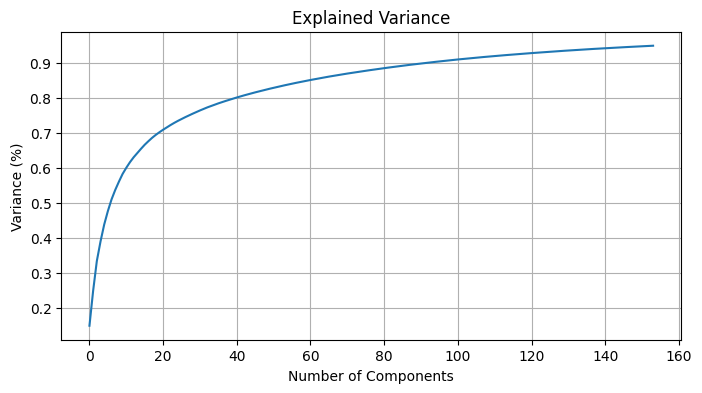

The original dataset had 784 features, but 95% of the variance of the data is retained with 154 features.


,Variance Explained (%),Number of Components
0,10.0,1
1,20.0,2
2,30.0,3
3,40.0,5
4,50.0,7
5,60.0,11
6,70.0,20
7,80.0,41
8,90.0,92
9,100.0,1


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.grid(True)
plt.show()

X_pca.shape, pca.n_components_

num_components_95_var = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.95)[0][0] + 1

print(f"The original dataset had 784 features, but 95% of the variance of the data is retained with {num_components_95_var} features.")

variance_thresholds = np.arange(0.1, 1.01, 0.1)  # From 10% to 100% variance
components_needed = [np.argmax(np.cumsum(pca.explained_variance_ratio_) >= threshold) + 1 for threshold in variance_thresholds]

# Create a table (DataFrame) with the results
variance_components_table = pd.DataFrame({
    'Variance Explained (%)': variance_thresholds * 100,
    'Number of Components': components_needed
})

variance_components_table

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
!pip install shap
import shap

data_scaled.loc[0:199, 'target'] = 0
data_scaled.loc[200:399, 'target'] = 1
data_scaled.loc[400:599, 'target'] = 2
data_scaled.loc[600:799, 'target'] = 3
data_scaled.loc[800:999, 'target'] = 4
data_scaled.loc[1000:1199, 'target'] = 5
data_scaled.loc[1200:1399, 'target'] = 6
data_scaled.loc[1400:1599, 'target'] = 7
data_scaled.loc[1600:1799, 'target'] = 8
data_scaled.loc[1800:1999, 'target'] = 9
y = data_scaled['target']

variance_thresholds = [0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]



X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.3, random_state=42,  stratify=y)

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(index=['Random Forest', 'KNN', 'Neural Network'])
trained_models = {}

for threshold in variance_thresholds:
    pca = PCA(n_components=threshold)
    pca.fit(data_scaled)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train Random Forest
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train_pca, y_train)
    y_pred_rf = rf_classifier.predict(X_test_pca)
    results_df.loc['Random Forest', threshold] = accuracy_score(y_test, y_pred_rf)
    trained_models[f'Random Forest_{threshold}'] = rf_classifier

    # Train K-Nearest Neighbors
    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(X_train_pca, y_train)
    y_pred_knn = knn_classifier.predict(X_test_pca)
    results_df.loc['KNN', threshold] = accuracy_score(y_test, y_pred_knn)
    trained_models[f'KNN_{threshold}'] = knn_classifier

    # Train Neural Network
    nn_classifier = MLPClassifier(random_state=42)
    nn_classifier.fit(X_train_pca, y_train)
    y_pred_nn = nn_classifier.predict(X_test_pca)
    results_df.loc['Neural Network', threshold] = accuracy_score(y_test, y_pred_nn)
    trained_models[f'Neural Network_{threshold}'] = nn_classifier

# Print the results
print(results_df)

                     0.2   0.3       0.4       0.5       0.6       0.7  \
Random Forest   0.628333  0.81  0.913333  0.943333  0.961667  0.976667   
KNN             0.623333  0.81  0.911667  0.965000  0.968333  0.981667   
Neural Network  0.648333  0.81  0.908333  0.943333  0.968333  0.983333   

                     0.8       0.9  
Random Forest   0.970000  0.970000  
KNN             0.986667  0.983333  
Neural Network  0.986667  0.988333  


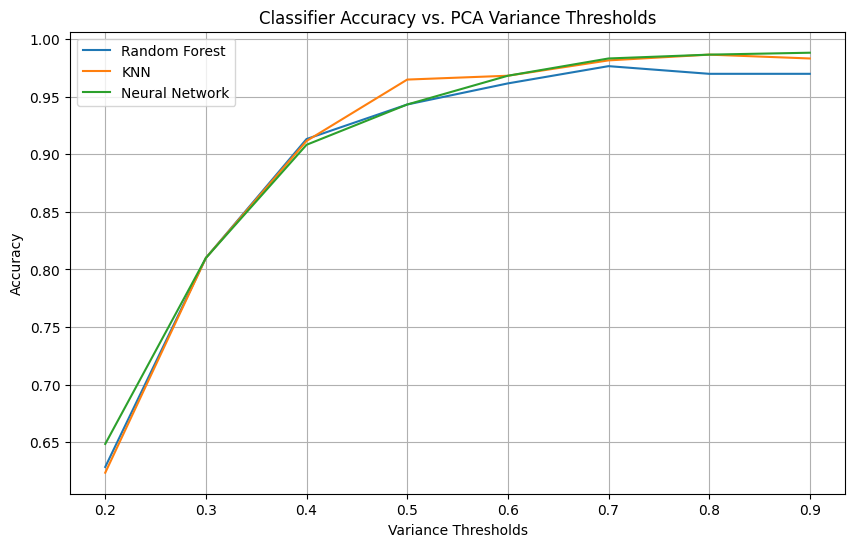

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for classifier in results_df.index:
    plt.plot(variance_thresholds, results_df.loc[classifier], label=classifier)

plt.title('Classifier Accuracy vs. PCA Variance Thresholds')
plt.xlabel('Variance Thresholds')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=0.7)
pca.fit(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca = pca.transform(X_train)
print(pca.n_components_)

explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)


df_variance = pd.DataFrame({
    'Component': np.arange(1, len(explained_variance_ratio) + 1),
    'Explained Variance': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_explained_variance_ratio
})

df_variance

df_variance_formatted = df_variance.copy()
df_variance_formatted['Explained Variance'] = df_variance['Explained Variance'].map('{:.2%}'.format)
df_variance_formatted['Cumulative Explained Variance'] = df_variance['Cumulative Explained Variance'].map('{:.2%}'.format)

df_variance_formatted

20


,Component,Explained Variance,Cumulative Explained Variance
0,1,14.45%,14.45%
1,2,9.93%,24.38%
2,3,8.39%,32.77%
3,4,5.76%,38.53%
4,5,4.92%,43.45%
5,6,3.90%,47.35%
6,7,3.54%,50.89%
7,8,3.01%,53.90%
8,9,2.29%,56.19%
9,10,2.24%,58.43%


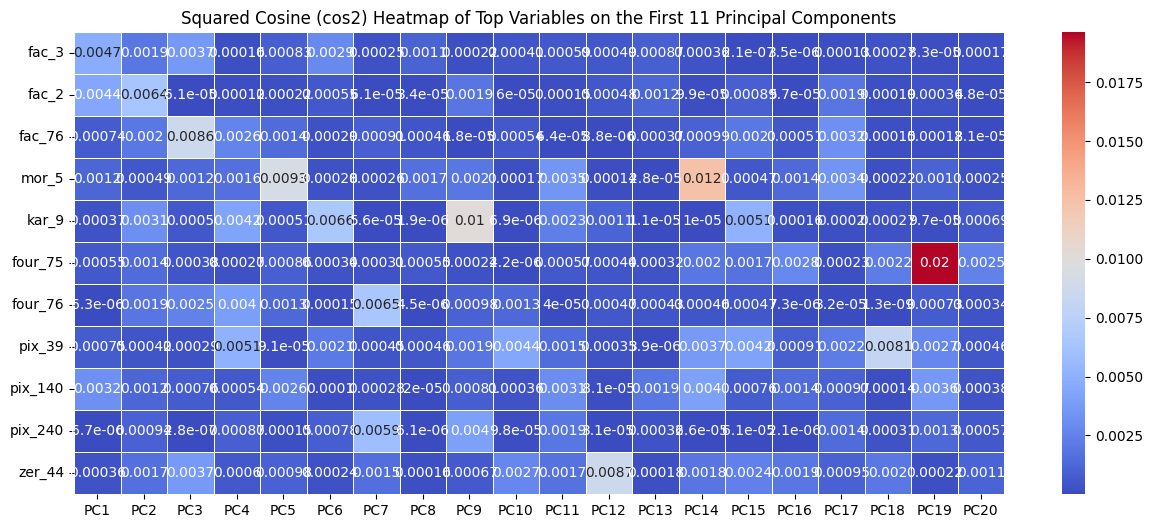

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

cos2_values = np.square(pca.components_.T)

# Sum of cos2 values across all components for each variable
sum_cos2 = np.sum(cos2_values, axis=1)

# Sort the variables by the sum of their cos2 values
sorted_indices = np.argsort(sum_cos2)[::-1]
indices_to_display = [2, 1, 75,360, 300, 290, 291, 400,501, 601,645]

# Create a DataFrame for the selected top variables
top_cos2_df = pd.DataFrame(cos2_values[indices_to_display, :], index=data_scaled.columns[indices_to_display],
                           columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Plotting the heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(top_cos2_df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Squared Cosine (cos2) Heatmap of Top Variables on the First 11 Principal Components')
plt.show()







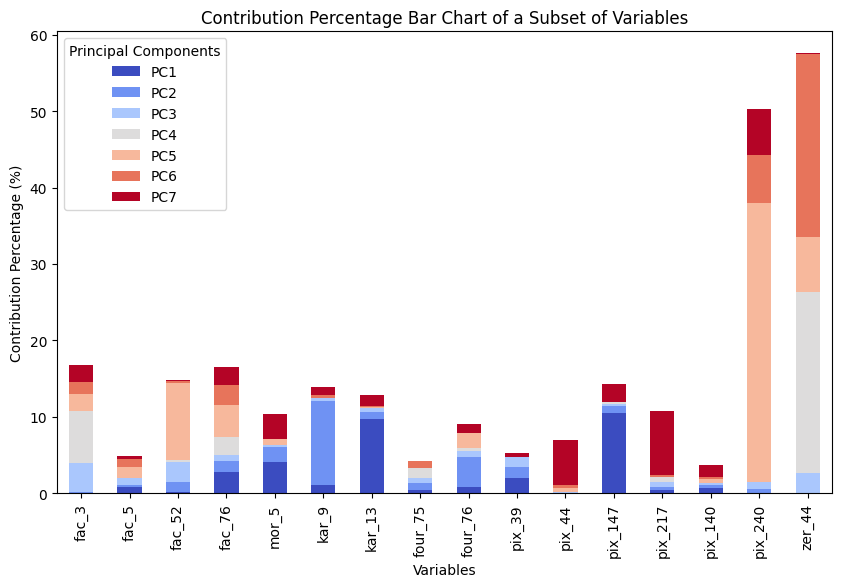

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA


axis_1 = u_selected[:, 0]


pd.DataFrame(u_selected)

data_scaled.shape
var_coord =u_selected
var_coord.shape
var_cos2 = var_coord ** 2

total_cos2 = np.sum(var_cos2, axis=1, keepdims=True)
var_contrib = (var_cos2 * 100) / total_cos2


# Sum the contributions along the components to get the total contribution of each variable
total_var_contrib = var_contrib.sum(axis=1)

indices_to_display = [2,4,51, 75,360, 300,304, 290, 291, 400,405,508,578,501, 601,645]


var_names = data_scaled.columns[indices_to_display]


indices_to_display = [2,4,51, 75,360, 300,304, 290, 291, 400,405,508,578,501, 601,645]

# Noms des colonnes correspondant aux indices
var_names = data.columns[indices_to_display]

# Extraction du sous-ensemble de données pour les variables spécifiées
subset_var_contrib = var_contrib[indices_to_display, :7]  # Sélection des colonnes 1 et 2

# Création d'un DataFrame pour utiliser avec pandas
subset_var_contrib_df = pd.DataFrame(subset_var_contrib, index=var_names, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7'])

# Création d'un diagramme à bandes
subset_var_contrib_df.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title('Contribution Percentage Bar Chart of a Subset of Variables')
plt.xlabel('Variables')
plt.ylabel('Contribution Percentage (%)')
plt.legend(title='Principal Components')
plt.show()




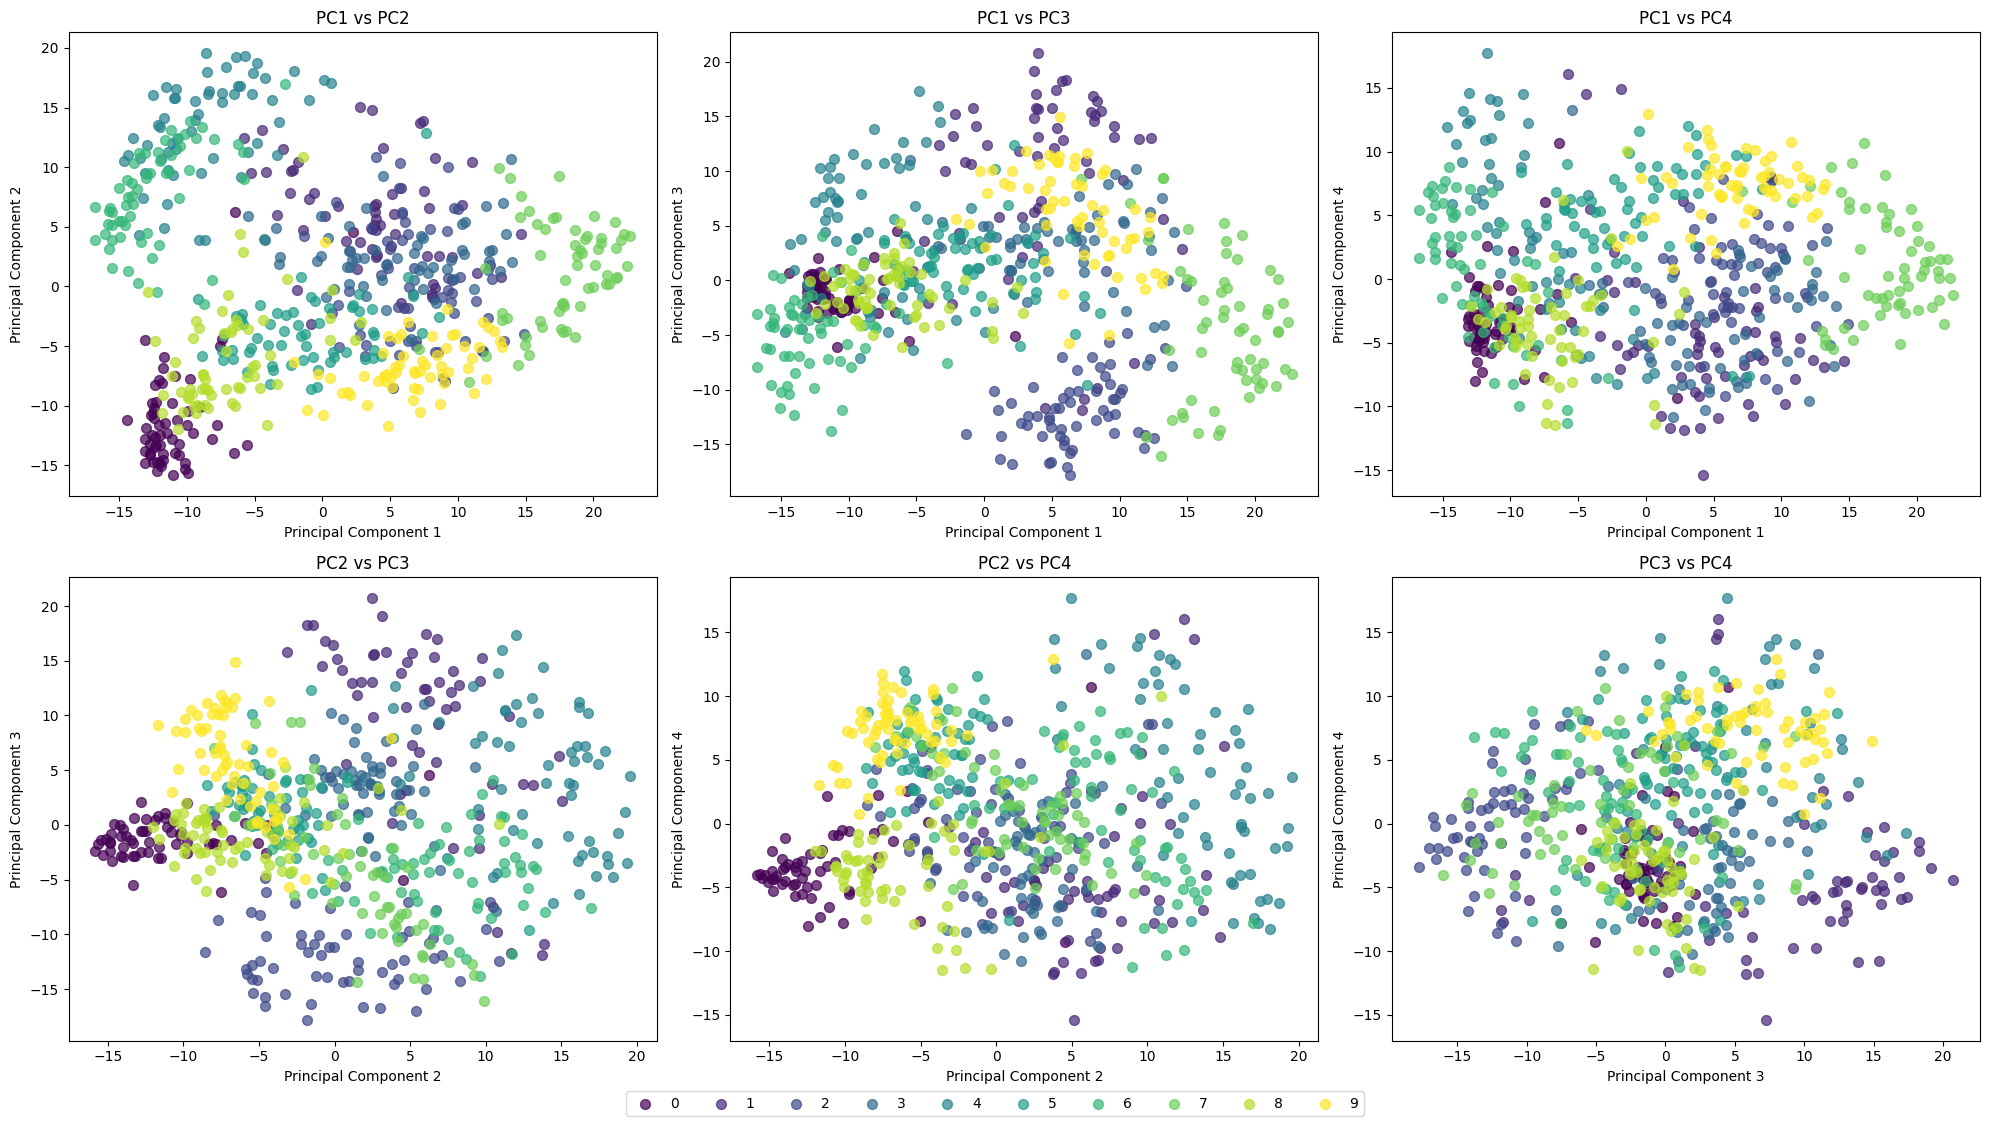

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# List to hold titles for the plots
titles = [
    'PC1 vs PC2', 'PC1 vs PC3', 'PC1 vs PC4',
    'PC2 vs PC3', 'PC2 vs PC4', 'PC3 vs PC4'
]

# Index pairs for each subplot
index_pairs = [
    (0, 1), (0, 2), (0, 3),
    (1, 2), (1, 3), (2, 3)
]

unique_clusters = np.unique(y_test)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

for i, ax in enumerate(axes.flatten()):
    pc1, pc2 = index_pairs[i]
    for cluster, color in zip(unique_clusters, colors):
        ix = np.where(y_test == cluster)
        ax.scatter(X_test_pca[ix, pc1], X_test_pca[ix, pc2], c=[color], label=f'{int(cluster)}', s=50, alpha=0.7)
    ax.set_xlabel(f'Principal Component {pc1 + 1}')
    ax.set_ylabel(f'Principal Component {pc2 + 1}')
    ax.set_title(titles[i])

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(unique_clusters), bbox_to_anchor=(0.5, 0.01))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

  0%|          | 0/30 [00:00<?, ?it/s]

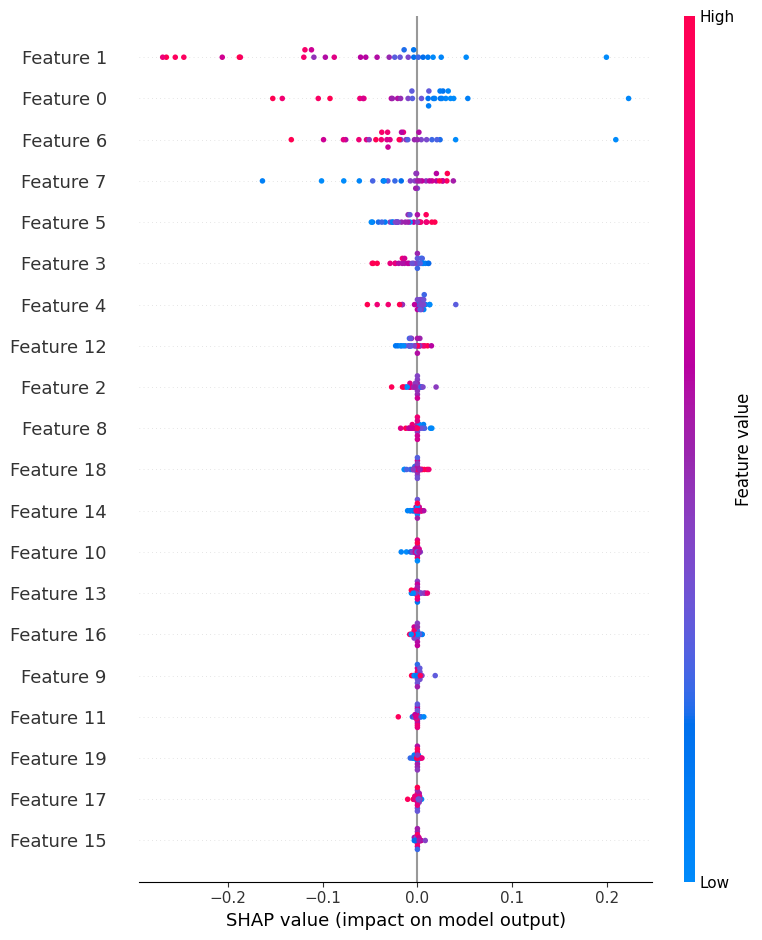

In [ ]:
import shap


# Fit KNN on the PCA-transformed data
knn_classifier = KNeighborsClassifier()
X_train_pca = pca.transform(X_train)

knn_classifier.fit(X_train_pca, y_train)


# Define a function that wraps the KNN predict function for compatibility with SHAP
def knn_predict_proba(X):
    class_labels = knn_classifier.predict(X)
    unique_classes = sorted(np.unique(y_train))
    class_to_index = {label: index for index, label in enumerate(unique_classes)}
    probabilities = np.zeros((X.shape[0], len(unique_classes)))
    for idx, class_label in enumerate(class_labels):
        probabilities[idx, class_to_index[class_label]] = 1
    return probabilities

# Create the SHAP explainer using the KNN predict_proba wrapper function
explainer = shap.KernelExplainer(knn_predict_proba, X_train_pca[:50])

# Calculate SHAP values for a subset of the test set
# Choose an appropriate subset size for the computational resources
subset_of_test_samples = X_test_pca[:30]
shap_values = explainer.shap_values(subset_of_test_samples)

shap.summary_plot(shap_values[0], subset_of_test_samples)


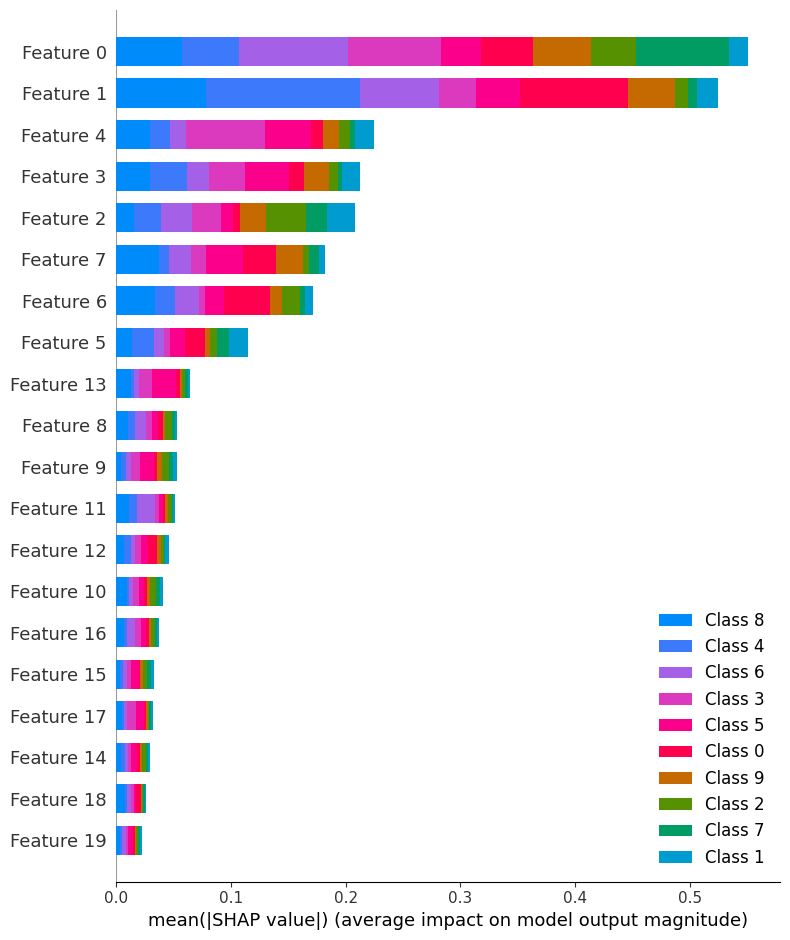

In [ ]:

shap.summary_plot(shap_values, subset_of_test_samples)


###Results

**VAR.Coord:** coordinates of variables to create a point cloud.

**VAR.cos2**: squared cosine of variables. Represents the quality of representation of variables on the PCA graph. It is calculated as the squared coordinates: var.cos2 = var.coord * var.coord.

**VAR.contrib**: contains the contributions (in percent) of the variables to the principal components.  The contribution of a variable (var) to a given principal component: (var.cos2 * 100) / (total compo- sant cos2)

In [ ]:
pd.DataFrame(u_selected)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,3.722395e-02,6.563217e-02,6.794041e-02,1.092556e-02,8.399548e-03,6.897822e-02,7.643999e-02,4.871233e-02,3.645685e-02,9.128355e-03,...,-0.002553,-4.149972e-02,-4.231921e-02,-6.611847e-02,6.823320e-02,3.380010e-02,5.300110e-02,-9.070142e-03,-7.652160e-02,-4.084062e-02
1,-6.867610e-02,-7.798522e-02,-4.264124e-02,-6.846507e-02,-5.795336e-02,2.237463e-02,-5.071288e-02,-5.808416e-02,-6.460415e-02,-7.212423e-02,...,0.030451,-3.177416e-02,-3.030012e-02,7.442485e-02,-4.538460e-02,-5.378909e-02,5.924649e-02,2.202608e-02,-5.509164e-03,4.791895e-02
2,7.676816e-03,1.040816e-02,6.528390e-02,-8.750573e-02,-5.062638e-02,-4.076877e-02,5.079934e-02,6.778636e-03,-7.801596e-02,3.579331e-02,...,-0.020545,-7.458301e-02,7.932836e-02,7.130996e-03,3.437920e-02,-9.245392e-02,-4.169828e-02,-5.219253e-02,1.866407e-02,3.282829e-03
3,6.715051e-02,-4.989687e-03,-1.918150e-02,6.442798e-02,-7.315427e-03,-2.428700e-02,-2.548686e-02,1.598774e-02,3.317322e-02,-1.828343e-02,...,0.029189,-2.917318e-02,2.317666e-02,2.432644e-03,-5.455915e-02,4.360155e-02,1.354074e-02,-5.664305e-02,2.295042e-03,6.361456e-02
4,2.602428e-02,-1.353871e-02,2.547287e-02,-3.043836e-03,3.333764e-02,2.731524e-02,1.861945e-02,-6.240640e-02,1.370903e-02,6.257216e-02,...,0.039141,-5.376242e-02,-6.141873e-02,-1.426938e-02,-5.347466e-03,-2.961434e-02,5.191254e-02,7.422371e-02,-5.739317e-02,-6.208613e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,-7.337690e-04,4.571540e-03,1.058471e-01,-1.598188e-02,-1.505965e-01,1.038501e-01,-1.565127e-02,-1.209169e-02,3.118734e-03,6.814189e-03,...,-0.004526,2.323184e-02,-1.163978e-02,6.816586e-03,5.071082e-02,5.561604e-02,1.159465e-03,-2.176719e-02,-4.364059e-03,1.716849e-03
645,1.341015e-03,7.882195e-03,-5.659358e-02,1.695560e-01,-9.306858e-02,-1.705711e-01,-6.231869e-03,1.448655e-03,1.834076e-04,-4.491327e-03,...,0.002523,-1.014926e-02,5.457314e-03,-3.308416e-04,-1.869003e-02,-1.551750e-01,4.464465e-03,2.149889e-03,-9.102593e-03,2.799360e-03
646,3.063439e-14,4.877626e-14,-1.749737e-12,-1.161793e-12,-7.292465e-14,1.612024e-12,9.348909e-14,2.470215e-14,4.594185e-14,-1.271218e-13,...,0.038036,5.829384e-14,-9.934457e-14,3.203356e-15,-2.202739e-13,3.184456e-13,-1.333380e-13,-2.271218e-13,-3.653074e-14,-2.857349e-14
647,-3.813705e-14,-8.075600e-16,5.728116e-13,3.546701e-13,-9.641536e-15,-1.019692e-12,-9.082457e-14,-1.320244e-14,-1.595363e-14,6.770923e-14,...,0.591065,-2.657985e-14,5.402335e-14,-5.843253e-15,2.303030e-13,-1.910841e-13,8.924483e-14,1.159609e-13,1.711000e-14,9.491147e-15


In [ ]:
data_scaled.shape

(2000, 650)

In [ ]:
var_coord =u_selected
var_coord.shape

(649, 44)

In [ ]:
var_cos2 = var_coord ** 2

In [ ]:
total_cos2 = np.sum(var_cos2, axis=1, keepdims=True)
var_contrib = (var_cos2 * 100) / total_cos2

# Affichage des résultats (à des fins de démonstration)
print("Variable coordinates :\n", pd.DataFrame(var_coord).head(1))
print("\nSquared cosine of variables :\n", pd.DataFrame(var_cos2).head(1))
print("\nTotal squared cosine by principal component :\n", pd.DataFrame(total_cos2).head(1))
print("\nVariable contributions to principal components :\n", pd.DataFrame(var_contrib).head(1))

Variable coordinates :
          0         1        2         3       4         5        6         7   \
0  0.037224  0.065632  0.06794  0.010926  0.0084  0.068978  0.07644  0.048712   

         8         9   ...        34      35        36        37        38  \
0  0.036457  0.009128  ... -0.002553 -0.0415 -0.042319 -0.066118  0.068233   

       39        40       41        42        43  
0  0.0338  0.053001 -0.00907 -0.076522 -0.040841  

[1 rows x 44 columns]

Squared cosine of variables :
          0         1         2         3         4         5         6   \
0  0.001386  0.004308  0.004616  0.000119  0.000071  0.004758  0.005843   

         7         8         9   ...        34        35        36        37  \
0  0.002373  0.001329  0.000083  ...  0.000007  0.001722  0.001791  0.004372   

         38        39        40        41        42        43  
0  0.004656  0.001142  0.002809  0.000082  0.005856  0.001668  

[1 rows x 44 columns]

Total squared cosine by principal c

In this section, we describe how to visualize the variables and draw conclusions about their correlations. Next, we highlight the variables according to i) their representational qualities on the graph or ii) their contributions to the principal components.

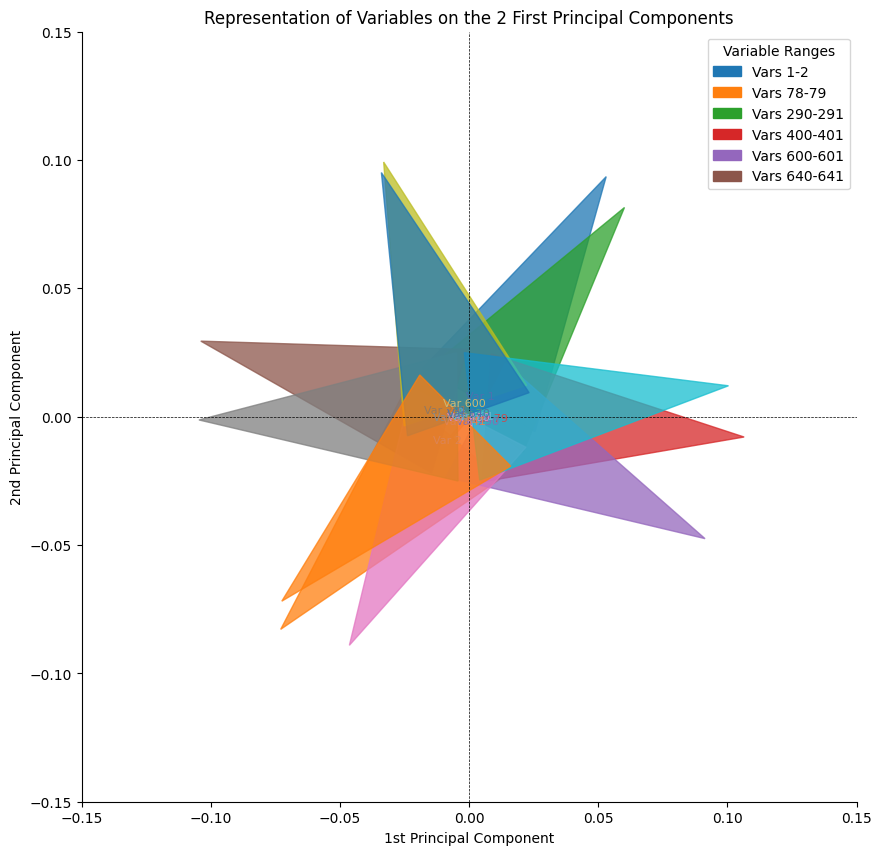

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Indices des variables à afficher
selected_indices_ranges = [(1,2), (78, 79), (290, 291), (400, 401), (600, 601), (640, 641)]




# Liste pour stocker les indices individuels
selected_indices = []

# Convertir les plages d'indices en liste d'indices individuels
for start, end in selected_indices_ranges:
    selected_indices.extend(range(start, end + 1))

# Création d'un cercle unité pour référence
circle = plt.Circle((0, 0), 1, edgecolor='b', facecolor='None')
fig, ax = plt.subplots(figsize=(10, 10))
ax.add_patch(circle)

# Ajustement de l'échelle pour rendre les flèches plus visibles
scale_factor = 0.1

# Liste pour stocker les objets Patch pour la légende
legend_patches = []

# Affichage des flèches pour les variables sélectionnées sur les deux premiers axes
for i, idx in enumerate(selected_indices):
    x_coord, y_coord = var_coord[i, 0] * scale_factor, var_coord[i, 1] * scale_factor
    arrow = ax.arrow(0, 0, x_coord, y_coord,
                     color=f'C{i}', alpha=0.75, head_width=0.05, head_length=0.1)

    # Ajout des labels pour chaque variable
    ax.annotate(f'Var {idx}', (1.2 * x_coord, 1.2 * y_coord),
                fontsize=8, ha='center', va='center', color=f'C{i}')

# Ajout des objets Patch pour la légende
for i, indices_range in enumerate(selected_indices_ranges):
    color = f'C{i}'
    legend_patches.append(Patch(color=color, label=f'Vars {indices_range[0]}-{indices_range[1]}'))

# Ajout de la légende
ax.legend(handles=legend_patches, title='Variable Ranges', loc='upper right')

# Réglages des axes
plt.xlim([-1.5 * scale_factor, 1.5 * scale_factor])
plt.ylim([-1.5 * scale_factor, 1.5 * scale_factor])
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Representation of Variables on the 2 First Principal Components')

# Style avec Seaborn
sns.set(style='whitegrid')
sns.despine()

plt.show()



The graph above is also known as the variable correlation plot. It shows the relationships between all variables and can be interpreted as follows:

1. **Positively Correlated Variables:** Variables that are positively correlated are clustered together on the plot. This means that when one variable increases, the other variable tends to increase as well.

2. **Negatively Correlated Variables:** Negatively correlated variables are positioned on opposite sides of the plot's origin (opposite quadrants). This indicates that when one variable increases, the other variable tends to decrease.

3. **Distance from the Origin:** The distance between variables and the origin of the correlation plot measures the quality of representation of variables by PCA. Variables that are far from the origin are well-represented by PCA, as this suggests they have significant contributions to the principal components.


###**Representation quality**

The quality of variable representation on the PCA map is called cos2 (cosine squared).

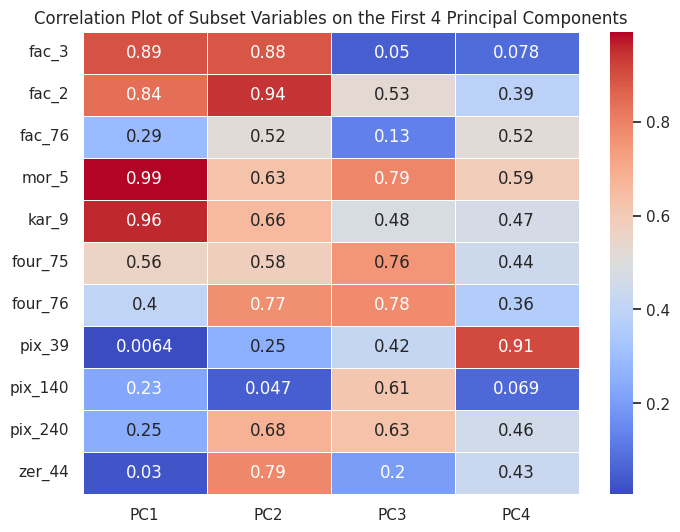

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

var_cos2 = np.random.rand(649, 44)

# Indices des colonnes à afficher
indices_to_display = [2, 1, 75,360, 300, 290, 291, 400,501, 601,645]

# Noms des colonnes correspondant aux indices
var_names = data.columns[indices_to_display]

# Extraction du sous-ensemble de données pour les variables spécifiées
subset_var_cos2 = var_cos2[indices_to_display, :4]

# Création d'un DataFrame pour utiliser avec seaborn
subset_var_cos2_df = pd.DataFrame(subset_var_cos2, index=var_names, columns=[f'PC{i+1}' for i in range(4)])

# Création de la heatmap avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(subset_var_cos2_df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Plot of Subset Variables on the First 4 Principal Components')
plt.show()


To summarize:
- cos2 values are used to estimate the quality of the representation
- The closer a variable is to the correlation circle, the better its representation on the PCA graph (and the more important it is for interpreting the principal components under consideration).
- Variables close to the center of the graph are less important for the first components.

###**Variable contributions to the main axes**

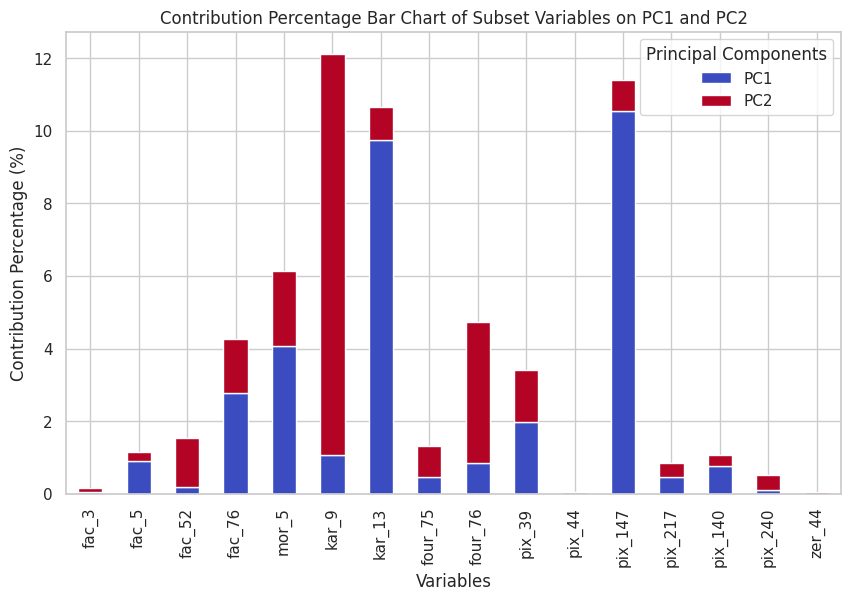

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Indices des colonnes à afficher
indices_to_display = [2,4,51, 75,360, 300,304, 290, 291, 400,405,508,578,501, 601,645]

# Noms des colonnes correspondant aux indices
var_names = data.columns[indices_to_display]

# Extraction du sous-ensemble de données pour les variables spécifiées
subset_var_contrib = var_contrib[indices_to_display, :2]

# Création d'un DataFrame pour utiliser avec pandas
subset_var_contrib_df = pd.DataFrame(subset_var_contrib, index=var_names, columns=['PC1', 'PC2'])

# Création d'un diagramme à bandes
subset_var_contrib_df.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title('Contribution Percentage Bar Chart of Subset Variables on PC1 and PC2')
plt.xlabel('Variables')
plt.ylabel('Contribution Percentage (%)')
plt.legend(title='Principal Components')
plt.show()


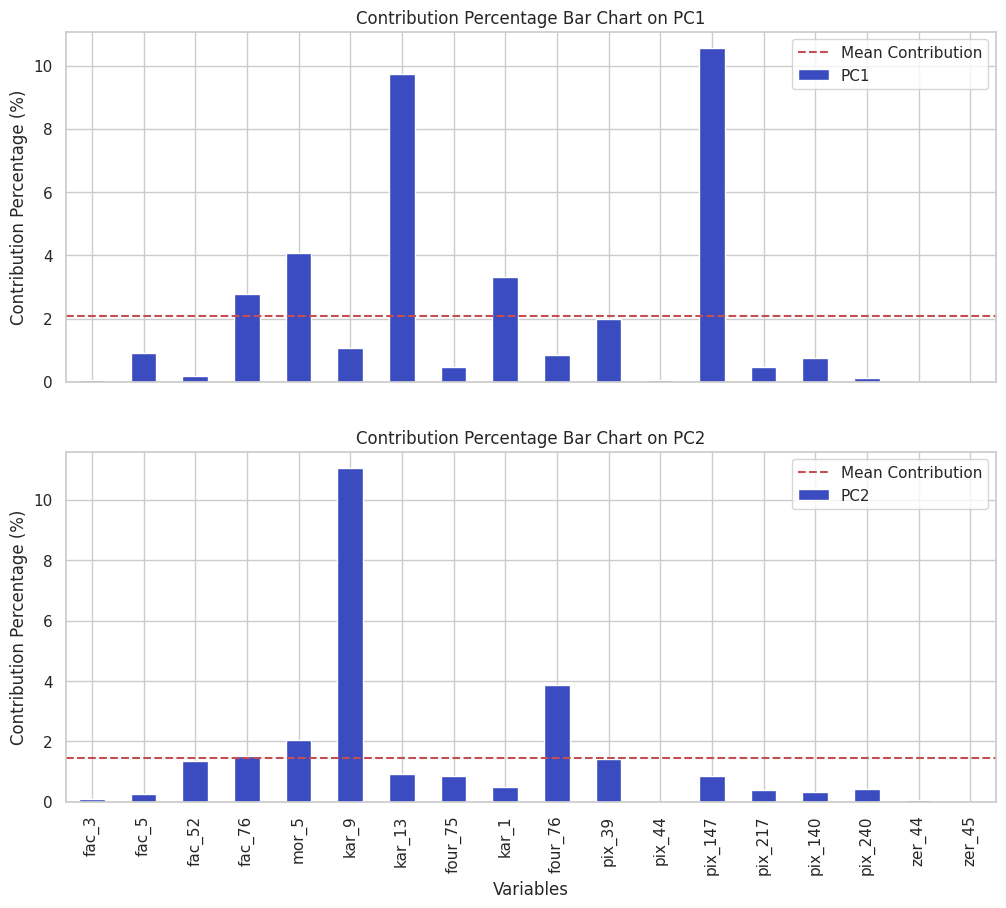

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# Indices des colonnes à afficher
indices_to_display = [2,4,51, 75,360, 300,304, 290,292, 291, 400,405,508,578,501, 601,645,646]

# Noms des colonnes correspondant aux indices
var_names = data.columns[indices_to_display]

# Extraction du sous-ensemble de données pour les variables spécifiées
subset_var_contrib = var_contrib[indices_to_display, :]

# Création d'un DataFrame pour utiliser avec pandas
subset_var_contrib_df = pd.DataFrame(subset_var_contrib, index=var_names, columns=[f'PC{i+1}' for i in range(subset_var_contrib.shape[1])])

# Calcul de la contribution moyenne pour chaque composante principale
mean_contrib = subset_var_contrib_df.mean()

# Création de deux graphiques distincts
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Graphique pour PC1
subset_var_contrib_df['PC1'].plot(kind='bar', stacked=True, colormap='coolwarm', ax=axes[0])
axes[0].axhline(mean_contrib['PC1'], color='r', linestyle='--', label='Mean Contribution')
axes[0].set_title('Contribution Percentage Bar Chart on PC1')
axes[0].set_ylabel('Contribution Percentage (%)')
axes[0].legend()

# Graphique pour PC2
subset_var_contrib_df['PC2'].plot(kind='bar', stacked=True, colormap='coolwarm', ax=axes[1])
axes[1].axhline(mean_contrib['PC2'], color='r', linestyle='--', label='Mean Contribution')
axes[1].set_title('Contribution Percentage Bar Chart on PC2')
axes[1].set_xlabel('Variables')
axes[1].set_ylabel('Contribution Percentage (%)')
axes[1].legend()

plt.show()


The red dotted line in the graph above indicates the expected average contributio. For a given component, a variable with a contribution above this threshold could be considered important in contributing to the component.

### Kmeans

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train_pca)
test_labels = kmeans.predict(X_test_pca)



In [ ]:
from sklearn.metrics import adjusted_rand_score
from scipy.stats import mode


silhouette_avg = silhouette_score(X_test_pca, test_labels)
print(silhouette_avg)

adjusted_rand_test = adjusted_rand_score(y_test, test_labels)
print("Adjusted Rand Index for Test Set: ", adjusted_rand_test)



0.23835613403597083
Adjusted Rand Index for Test Set:  0.8311473108221699


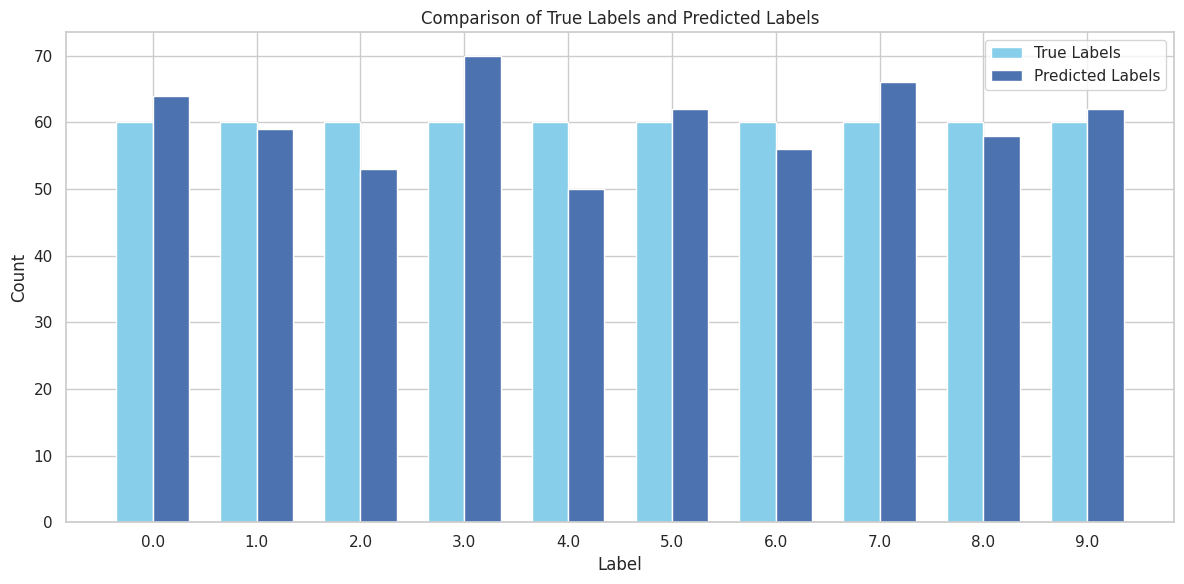

0.23835613403597083
Adjusted Rand Index for Test Set:  0.8311473108221699


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a DataFrame for the true and predicted labels
df = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': test_labels})

# Calculate the distributions
true_label_distribution = df['True Labels'].value_counts().sort_index()
predicted_label_distribution = df['Predicted Labels'].value_counts().sort_index()

combined = pd.concat([true_label_distribution, predicted_label_distribution], axis=1)
combined.columns = ['True Labels', 'Predicted Labels']
combined = combined.fillna(0)  # Fill missing values with 0

fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(len(combined))
bar_width = 0.35

rects1 = ax.bar(index, combined['True Labels'], bar_width, label='True Labels', color='skyblue')
rects2 = ax.bar(index + bar_width, combined['Predicted Labels'], bar_width, label='Predicted Labels')

ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('Comparison of True Labels and Predicted Labels')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(combined.index)
ax.legend()

plt.tight_layout()
plt.show()

ilhouette_avg = silhouette_score(X_test_pca, test_labels)
print(silhouette_avg)

adjusted_rand_test = adjusted_rand_score(y_test, test_labels)
print("Adjusted Rand Index for Test Set: ", adjusted_rand_test)

#UMAP

After performing Principal Component Analysis (PCA) to reduce the dimensionality of our dataset, we are now exploring another dimensionality reduction technique called UMAP (Uniform Manifold Approximation and Projection). While PCA allowed us to project our data into a lower-dimensional space while preserving linear relationships, UMAP offers a non-linear approach to data visualization. In this step, we will apply UMAP to our dataset to further explore the underlying structure and non-linear relationships between data points. This approach could potentially reveal more complex structures and groupings that PCA might not have captured. Let's embark on this exciting data exploration journey through UMAP to gain a more comprehensive perspective of our dataset.

**UMAP**, an acronym for Uniform Manifold Approximation and Projection, is a dimensionality reduction technique designed to create a lower-dimensional representation of high-dimensional data while preserving both global and local structures. The method employs a graph-based approach to construct a topological representation, subsequently embedding it in a lower-dimensional space using stochastic gradient descent. The UMAP procedure encompasses several key steps:

1. Calculate pairwise distances between data points in the high-dimensional space, utilizing metrics such as Euclidean, cosine, or correlation distance.

2. Based on pairwise distances, construct a fuzzy simplicial set to represent the local neighborhood structure of data points, considering density and connectivity.

3. Utilize stochastic gradient descent to optimize a low-dimensional representation that preserves neighborhood relationships captured by the fuzzy simplicial set.

4. Create a graph representation from the low-dimensional embedding, capturing the global structure. Apply graph layout algorithms for positioning data points in the lower-dimensional space.

5. Implement a refinement step to adjust data point positions based on the graph structure and connectivity.

6. Iterate optimization and refinement steps until convergence, determined by a specified number of iterations or a stopping criterion.

7. Visualize and analyze the final low-dimensional embedding, which aims to preserve both local and global structures for tasks such as visualization, clustering, or further analysis.

**Benefits of UMAP:**

1. **Speed**: UMAP is fast, handling large datasets and high-dimensional data efficiently, even surpassing many t-SNE packages.

2. **Scalability**: UMAP scales well in embedding dimension, serving as a general-purpose dimension reduction technique for various machine learning tasks.

3. **Global Structure Preservation**: UMAP often outperforms t-SNE in preserving aspects of the global structure of the data, providing a comprehensive overview.

4. **Versatile Distance Functions**: UMAP supports a wide range of distance functions, including non-metric ones like cosine and correlation distance.

5. **Dynamic Embedding**: UMAP allows adding new points to an existing embedding, making it suitable for use as a preprocessing transformer in sklearn pipelines.

6. **Supervised and Semi-Supervised Dimension Reduction**: UMAP supports supervised and semi-supervised dimension reduction, incorporating label information.

7. **Additional Features**: UMAP offers experimental features such as an "inverse transform," embedding into non-Euclidean spaces, and preliminary support for embedding dataframes.

8. **Theoretical Foundations**: UMAP is grounded in solid theoretical foundations in manifold learning, justifying its approach and paving the way for future extensions.

In [ ]:
data.shape

(2000, 649)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=97587a2b4eecba17c2a52589a2072149a1081c04aefd7819f28ee20e8d1e4807
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


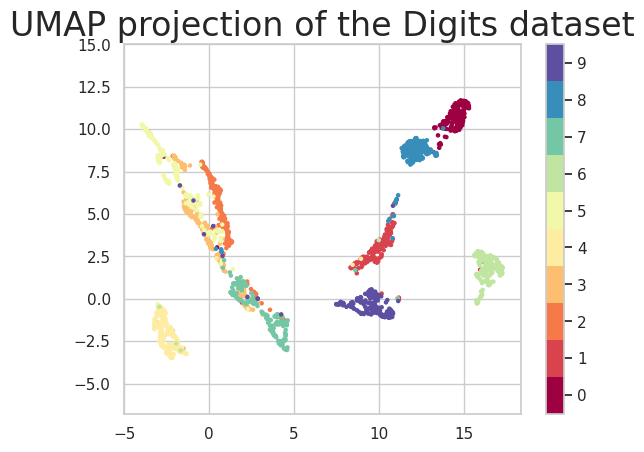

In [ ]:

! pip install umap-learn
import umap

reducer = umap.UMAP(random_state=42)

embedding = reducer.fit_transform(data)

reduced_coordinates = embedding

reduced_coordinates.shape

data_pca.loc[0:199, 'target'] = 0
data_pca.loc[200:399, 'target'] = 1
data_pca.loc[400:599, 'target'] = 2
data_pca.loc[600:799, 'target'] = 3
data_pca.loc[800:999, 'target'] = 4
data_pca.loc[1000:1199, 'target'] = 5
data_pca.loc[1200:1399, 'target'] = 6
data_pca.loc[1400:1599, 'target'] = 7
data_pca.loc[1600:1799, 'target'] = 8
data_pca.loc[1800:1999, 'target'] = 9

plt.scatter(embedding[:, 0], embedding[:, 1], c=data_pca['target'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

We now have a data set with 2000 rows (one for each sample of handwritten digits), but only 2 columns

In [ ]:
import umap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score


n_neighbors_options = [5, 15, 30]
min_dist_options = [0.0, 0.1, 0.5]

# Store the best score and corresponding best parameters
best_score = -1
best_params = {}
best_embedding = None

# List to store results
results = []

# Iterate through all combinations of hyperparameters
for n_neighbors in n_neighbors_options:
    for min_dist in min_dist_options:
        reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
        X_umap = reducer.fit_transform(X_test_pca)
        score = silhouette_score(X_umap, y_test)

        # Append the results
        results.append({
            'n_neighbors': n_neighbors,
            'min_dist': min_dist,
            'silhouette_score': score
        })

        # Check for the best score
        if score > best_score:
            best_score = score
            best_params = {'n_neighbors': n_neighbors, 'min_dist': min_dist}
            best_embedding = X_umap

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)



   n_neighbors  min_dist  silhouette_score
0            5       0.0          0.658939
1            5       0.1          0.631928
2            5       0.5          0.547820
3           15       0.0          0.668117
4           15       0.1          0.630157
5           15       0.5          0.537572
6           30       0.0          0.643286
7           30       0.1          0.593622
8           30       0.5          0.510291


   n_neighbors  min_dist  silhouette_score
0            5       0.0          0.658939
1            5       0.1          0.631928
2            5       0.5          0.547820
3           15       0.0          0.668117
4           15       0.1          0.630157
5           15       0.5          0.537572
6           30       0.0          0.643286
7           30       0.1          0.593622
8           30       0.5          0.510291
Best parameters found: {'n_neighbors': 15, 'min_dist': 0.0}
Best silhouette score: 0.668116569519043


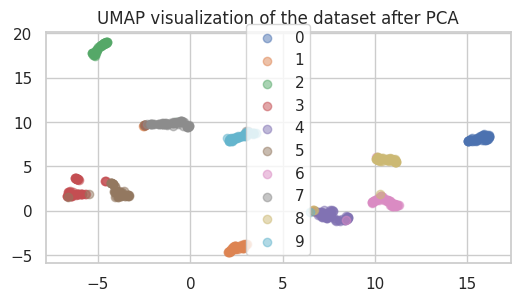

In [ ]:
# Display the best parameters and score
print(results_df)

print(f"Best parameters found: {best_params}")
print(f"Best silhouette score: {best_score}")

# Visualization of the best embedding
plt.figure(figsize=(6, 3))
for i in range(10):
    mask = y_test == i
    plt.scatter(best_embedding[mask, 0], best_embedding[mask, 1], label=i, alpha=0.5)
plt.title('UMAP visualization of the dataset after PCA')
plt.legend()
plt.show()


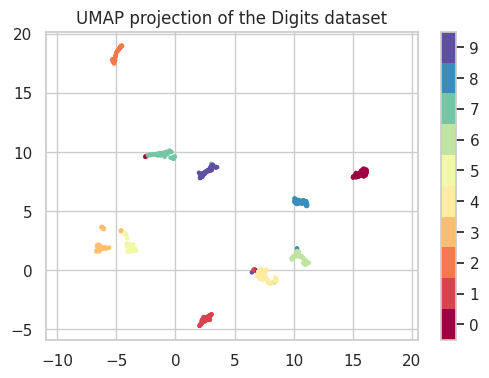

In [ ]:
plt.figure(figsize=(6, 4))
scatter = plt.scatter(best_embedding[:, 0], best_embedding[:, 1], c=y_test, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Digits dataset')
plt.colorbar(scatter, boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()

We can see that UMAP has succeeded in capturing the number classes. There are also some interesting effects insofar as certain digit classes blend together (the ones, threes, sixes and nines in the middle, for example), as well as cases where the digits are repelled as clearly distinct (the fives in the bottom right). . Overall, the classes have been correctly grouped.

In UMAP (Uniform Manifold Approximation and Projection), the "neighbors" parameter refers to the number of neighboring data points considered when constructing the high-dimensional representation of the data. This parameter influences the local connectivity of the manifold and can have a significant impact on the resulting visualization.

Varying the number of neighbors allows you to control the level of granularity and detail in the representation. Smaller values capture more local structure and fine details, while larger values result in a smoother and more global representation.

In practice, it is common to experiment with different neighbor values to find the configuration that best suits the specific characteristics of your data. Choosing an appropriate number of neighbors is crucial for obtaining a meaningful and informative UMAP projection. It often involves finding a balance between capturing complex local patterns and maintaining a coherent global structure in the reduced-dimensional space.

# t-SNE
### Functioning of t-SNE
t-SNE (t-Distributed Stochastic Neighbor Embedding) is a sophisticated machine learning algorithm used primarily for visualizing high-dimensional data in a low-dimensional space (usually two or three dimensions). It's particularly popular for its ability to reveal the structure and patterns within complex datasets. Here's an overview of how t-SNE functions:

1. **High-Dimensional Similarity:**
   - t-SNE starts by calculating the pairwise similarities between all points in the high-dimensional space. This is done by measuring the Euclidean distance between points and converting these distances into probabilities that represent similarities.
   - The similarity of datapoint $x_j$ to datapoint $x_i$ is represented as a conditional probability $p_{j|i}$, which is high when $x_j$ is close to $x_i$. This is computed using a Gaussian distribution centered on $x_i$.

2. **Low-Dimensional Counterpart:**
   - t-SNE then creates a low-dimensional space (usually 2D or 3D) to represent the data. Initially, it places the low-dimensional points (representations of the high-dimensional points) randomly.
   - In this space, the similarity between points $y_i$ and $y_j$ (the low-dimensional counterparts of $x_i$ and $x_j$) is also calculated using probabilities, but with a t-distribution (hence the "t" in t-SNE), which has heavier tails than a Gaussian distribution.

3. **Kullback-Leibler Divergence Minimization:**
   - The main objective of t-SNE is to minimize the difference between the two probability distributions: the high-dimensional distribution (in the original space) and the low-dimensional distribution (in the reduced space).
   - This difference is measured using the Kullback-Leibler (KL) divergence, a method of measuring how one probability distribution diverges from a second, expected probability distribution.
   - t-SNE iteratively adjusts the positions of the points in the low-dimensional space to minimize the KL divergence.

4. **Focus on Local Structure:**
   - t-SNE places a higher emphasis on local structures, trying to ensure that if points are close in the high-dimensional space, they should be close in the low-dimensional space. However, it's less concerned about accurately preserving distances between widely separated points.

5. **Perplexity Parameter:**
   - A key parameter in t-SNE is perplexity, which can be loosely thought of as the number of effective nearest neighbors. It affects the balance between attention to local versus global aspects of the data. Choosing the right perplexity is crucial for revealing the intrinsic structure of the data.

6. **Random Initialization and Non-Convexity:**
   - The random initialization of points in the low-dimensional space means that different runs of t-SNE on the same data can yield different results. This is because the KL divergence minimization problem is non-convex.

t-SNE is particularly powerful for visualizing clusters or groups in data, and for revealing the local structure of the data. However, the distances between clusters in the t-SNE plot are not necessarily meaningful, and the algorithm's reliance on random initialization can lead to different results on different runs. Despite these limitations, t-SNE is widely used for exploratory data analysis, especially in fields like bioinformatics, machine learning, and social network analysis.

### Synergy with PCA

- **Initial Dimensionality Reduction with PCA:** PCA is first applied to reduce the number of dimensions to a more computationally manageable size. This is especially helpful when the original dataset has hundreds or thousands of dimensions, which would make t-SNE computationally expensive and time-consuming.


- **Noise Reduction and Variance Preservation:** PCA helps to remove noise by emphasizing the directions where variance is highest, which can be beneficial before t-SNE is applied, as t-SNE then focuses on the most informative features.


- **Speeding Up t-SNE:** By reducing the dimensions beforehand, PCA can significantly speed up t-SNE, which is slower with the increasing number of dimensions due to its complexity.

- **Enhanced t-SNE Performance:** The use of PCA before t-SNE can also help to avoid some of the pitfalls of t-SNE, like the tendency to form clusters even when they might not be very distinct. Starting with a cleaner, lower-dimension dataset can lead to better t-SNE performance.

- **Balancing Global and Local Structure:** While PCA helps to maintain the global structure of the data by preserving the components with the largest variance, t-SNE complements this by preserving the local structures, revealing clusters and relationships that might not be apparent with PCA alone.

- **Application in Large Datasets:** In practice, for very large datasets, it might be the only feasible way to use t-SNE, as without PCA reduction, the t-SNE step might be too resource-intensive.

- **Improved Visualization:** The combination allows practitioners to visualize datasets in a way that both the broad trends and the fine-grained structure are revealed, which can be critical for tasks such as identifying subgroups within data or understanding complex datasets with many variables.

Overall, the combination of PCA and t-SNE is a powerful approach for dimensionality reduction and visualization, allowing data scientists and analysts to efficiently and effectively discover patterns and structures in large, high-dimensional datasets.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.3, random_state=42)


pca = PCA(n_components=0.6)
pca.fit(X_train)
X_test_pca = pca.transform(X_test)
print(pca.n_components_)

# t-SNE hyperparameter search
perplexities = [5, 30, 50]
learning_rates = [200, 500, 1000]

# DataFrame to store results
results_df = pd.DataFrame(columns=["Perplexity", "Learning Rate", "Silhouette Score"])

# Perform t-SNE with different hyperparameters
for perplexity in perplexities:
    for learning_rate in learning_rates:
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=1000)
        X_tsne = tsne.fit_transform(X_test_pca)
        score = silhouette_score(X_tsne, y_test)

        # Store results in DataFrame
        results_df = results_df.append({"Perplexity": perplexity, "Learning Rate": learning_rate, "Silhouette Score": score}, ignore_index=True)

# Sort and find the best parameters
results_df.sort_values(by="Silhouette Score", ascending=False, inplace=True)
best_row = results_df.iloc[0]
best_score = best_row["Silhouette Score"]
best_params = {'perplexity': best_row["Perplexity"], 'learning_rate': best_row["Learning Rate"]}

# Display the results
print(results_df)
print(f"Best Score: {best_score}, Best Parameters: {best_params}")


11
   Perplexity  Learning Rate  Silhouette Score
3        30.0          200.0          0.589758
5        30.0         1000.0          0.572907
4        30.0          500.0          0.567397
7        50.0          500.0          0.535589
8        50.0         1000.0          0.534740
6        50.0          200.0          0.533718
1         5.0          500.0          0.487523
2         5.0         1000.0          0.486387
0         5.0          200.0          0.471593
Best Score: 0.5897582769393921, Best Parameters: {'perplexity': 30.0, 'learning_rate': 200.0}


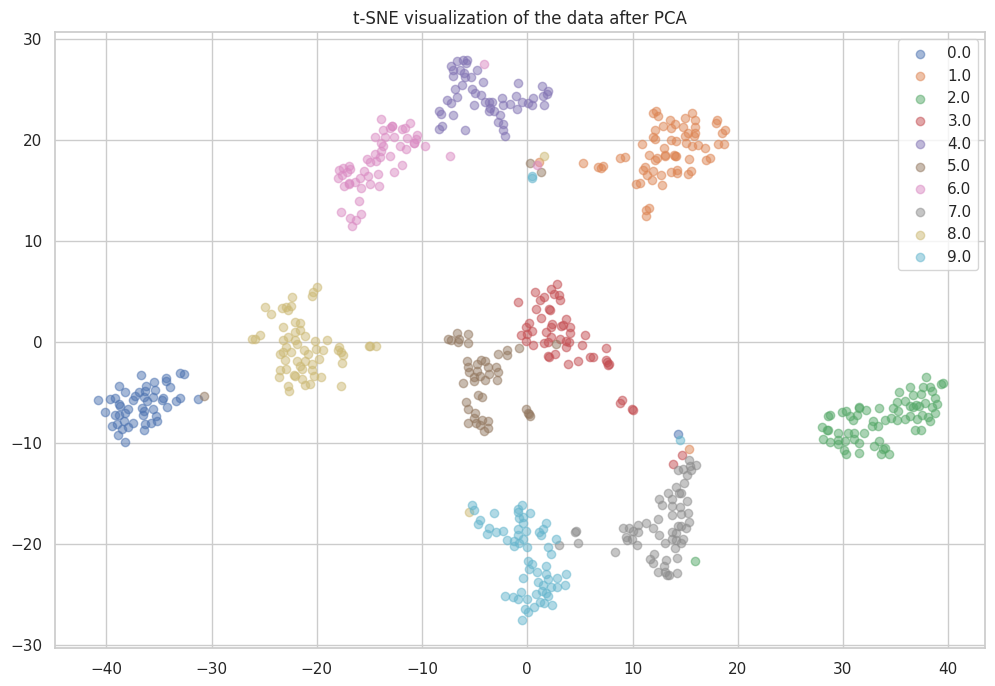

In [ ]:
tsne = TSNE(n_components=2, perplexity=best_params['perplexity'], learning_rate=best_params['learning_rate'], n_iter=1000)
best_embedding = tsne.fit_transform(X_test_pca)

# Visualization
plt.figure(figsize=(12, 8))

unique_classes = np.unique(y_test)
for i in unique_classes:
    mask = y_test == i
    plt.scatter(best_embedding[mask, 0], best_embedding[mask, 1], label=i, alpha=0.5)

plt.title('t-SNE visualization of the data after PCA')
plt.legend()
plt.show()

The graph shows athe t-SNE visualization of the dataset after PCA reduction. The visualization is color-coded to represent the 10 different classes of digits (0 through 9), and each dot in the plot corresponds to a digit image that has been compressed into two dimensions for visualization purposes.

The t-SNE plot provides a 2D map where similar items are placed near each other, and dissimilar items are placed further apart. Here's how to interpret the results:

**Cluster Formation**: Each cluster appears to contain points (digit images) that are the same color, indicating that t-SNE has effectively grouped similar digit images together. This suggests that the algorithm has preserved local structure and that images of the same digit are more similar to each other than to images of other digits.

**Separation Between Clusters**: The clusters are mostly well-separated, although there is some overlap and intermingling between some of them. This overlap might be due to the inherent similarities between certain digits (like '4' and '9', or '3' and '8'), or it might be a consequence of the dimensionality reduction process, which can sometimes cause distinct but high-dimensional structures to project closely in lower-dimensional space.

**Outliers**: There are a few points that seem to stray away from their respective clusters. These outliers could represent digits that were not written clearly or were unusual in some way that made them dissimilar to typical examples of their class.

**Silhouette Score**: The silhouette score provided is approximately 0.368, which is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A score near 0 indicates overlapping clusters, while a score closer to 1 indicates that the clusters are well-separated. In this case, the score suggests that there is a reasonable amount of separation between clusters, but also some degree of overlap.

In conclusion, the t-SNE visualization indicates a generally effective dimensionality reduction, with good but not perfect separation of the different digit classes. The silhouette score reinforces this interpretation, confirming that while the clusters are distinct, there is room for improvement in their separation.
